In [1]:
import numpy as np
import sklearn.datasets

In [2]:
np.random.seed(0)

#### Generating a dataset with the make_moons function available in scikit_learn.

In [3]:
X, Y = sklearn.datasets.make_moons(n_samples = 400, noise = 0.20)

In [4]:
X.shape, Y.shape

((400, 2), (400,))

In [5]:
import matplotlib.pyplot as plt

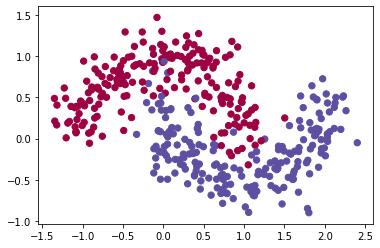

In [6]:
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [7]:
from sklearn.model_selection import train_test_split as tts

#### Dividing the dataset for training and testing the dataset.

In [8]:
X_train, X_test, Y_train, Y_test = tts(X, Y, random_state = 52, stratify = Y)

## DESIGNING THE NEURAL NETWORK

#### Defining the sigmoid and relu activation functions that will be used in the forward propagation in training the neural network.

In [9]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [10]:
def relu(Z):
    A = np.maximum(0, Z)
    return A

#### Defining the derivative functions: sigmoid_backward and relu_backward that will be used in the gradient descent algorithm during backward propagation in training the neural network.

In [11]:
def sigmoid_backward(Z, dA):
    s = 1/(1+np.exp(-Z))
    dZ = dA*s*(1-s)
    
    assert(dZ.shape == Z.shape)
    return dZ

In [12]:
def relu_backward(Z, dA):
    dZ = np.array(dA, copy = True)
    
    dZ[Z<=0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

#### Defining the forward propagation funtion that will calculate:

#### 1. z[l] = w[l] * a[l-1] + b

#### 2. actvate the z

#### for each layer.

In [13]:
def forward_propagation(layer_dims, A0, W, b, actfunc):
    Z = {}
    A = {}
    A["A0"] = A0
    
    for i in range(1, len(layer_dims)):
        Z['Z'+str(i)] = np.dot(W['W'+str(i)], A['A'+str(i-1)]) + b['b'+str(i)]
        if actfunc[i-1] == "sigmoid":
            A['A'+str(i)] = sigmoid(Z['Z'+str(i)])
        elif actfunc[i-1] == "relu":
            A['A'+str(i)] = relu(Z['Z'+str(i)])
            
    return Z, A

#### Defining the logistic loss cost function that determines how well the neural network is learning at each iteration.

In [14]:
def cost_function(AN, Y, m):
    cost = -(1/m) * np.sum(np.multiply(Y, np.log(AN)) + np.multiply((1-Y), np.log(1-AN)))
    cost = np.squeeze(cost)
    return cost

#### Defining the backward propagation function that computes the gradients which will be used to update the parameters. (Gradient Descent Algorithm)

In [15]:
def backward_propagation(layer_dims, A, Z, W, Y, actfunc, m):
    dA = {}
    dZ = {}
    dW = {}
    db = {}
    
    for i in range(len(layer_dims)-1, 0, -1):
        if i == len(layer_dims)-1:
            dA["dA"+str(i)] = A['A'+str(i)] - Y
        else:
            dA["dA"+str(i)] = np.dot(W['W'+str(i+1)].T, dZ["dZ"+str(i+1)])
            
        if actfunc[i-1] == 'sigmoid':
            dZ["dZ"+str(i)] = sigmoid_backward(Z['Z'+str(i)], dA["dA"+str(i)])
        elif actfunc[i-1] == 'relu':
            dZ["dZ"+str(i)] = relu_backward(Z['Z'+str(i)], dA["dA"+str(i)])
            
        dW["dW"+str(i)] = (1/m) * np.dot(dZ["dZ"+str(i)], A['A'+str(i-1)].T)
        db["db"+str(i)] = (1/m) * np.sum(dZ["dZ"+str(i)], axis = 1, keepdims = True)
        
    return dW, db

#### Updating the parameters.

In [16]:
def update_parameters(layer_dims, W, b, dW, db, learning_rate):
    for i in range(1, len(layer_dims)):
        W['W'+str(i)] = W['W'+str(i)] - learning_rate*dW["dW"+str(i)]
        b['b'+str(i)] = b['b'+str(i)] - learning_rate*db["db"+str(i)]
    
    return W, b

#### Initializing the parameters.

In [18]:
def initialize_parameters(layer_dims):
    W = {}
    b = {}
    
    for i in range(1, len(layer_dims)):
        W['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.1
        b['b' + str(i)] = np.zeros((layer_dims[i], 1))
        
    return W, b

#### Defining the model by putting together all the functions designed earlier.

In [19]:
def model(X, Y, layer_dims, actfunc, learning_rate, iterations):
    m = X.shape[1]
    
    costs = []
    
    Z_values = {}
    A_values = {}
    
    # initializing the parameters
    W_values, b_values = initialize_parameters(layer_dims)
    
    dW_values = {}
    db_values = {}
    
    for i in range(iterations):
        # forward propagation
        Z_values, A_values = forward_propagation(layer_dims, X, W_values, b_values, actfunc)
        
        # logistic cost function
        cost = cost_function(A_values['A'+str(len(layer_dims)-1)], Y, m)
        costs.append(cost)
        
        # backward propagation
        dW_values, db_values = backward_propagation(layer_dims, A_values, Z_values, W_values, Y, actfunc, m)
        
        # updating the parameters
        W_values, b_values = update_parameters(layer_dims, W_values, b_values, dW_values, db_values, learning_rate)
        
        i = i+1
    
        if i>0 and i%1000 == 0:
            print("cost after", i, "iterations:", cost)
            
    print("lowest cost:", costs[len(costs)-1])

    plt.scatter(range(iterations), costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()
    
    return W_values, b_values

#### Defining the function that will predict according to the model trained.

In [20]:
def predict(X, W, b, layer_dims, actfunc):
    Z = {}
    A = {}
    A["A0"] = X
    
    for i in range(1, len(layer_dims)):
        Z['Z'+str(i)] = np.dot(W['W'+str(i)], A['A'+str(i-1)]) + b['b'+str(i)]
        if actfunc[i-1] == "sigmoid":
            A['A'+str(i)] = sigmoid(Z['Z'+str(i)])
        elif actfunc[i-1] == "relu":
            A['A'+str(i)] = relu(Z['Z'+str(i)])
            
    li = []

    for i in range(A['A'+str(len(layer_dims)-1)].shape[1]):
        if A['A'+str(len(layer_dims)-1)][0][i]>=0.5:
            li.append(1)
        else:
            li.append(0)
    
    Y_pred = np.array(li)
    
    return Y_pred

#### Hereon, as per user choice.

#### Defining the layer dimensions: number oh hidden layers and number of units in each layer and the activation functions.

In [21]:
layer_dims = [2, 5, 3, 1]
actfunc = ["relu", "relu", "sigmoid"]

#### Training the model.

cost after 1000 iterations: 0.691621079496195
cost after 2000 iterations: 0.6908947948428399
cost after 3000 iterations: 0.6896874530981092
cost after 4000 iterations: 0.6875398036083264
cost after 5000 iterations: 0.6833894108702083
cost after 6000 iterations: 0.67449564594131
cost after 7000 iterations: 0.6536411590228504
cost after 8000 iterations: 0.6081048378395685
cost after 9000 iterations: 0.5438510007034849
cost after 10000 iterations: 0.4871587554408192
cost after 11000 iterations: 0.4438364396091252
cost after 12000 iterations: 0.4117426598645155
cost after 13000 iterations: 0.38736880800697077
cost after 14000 iterations: 0.36927968757235974
cost after 15000 iterations: 0.3557856286007452
cost after 16000 iterations: 0.34561418057054893
cost after 17000 iterations: 0.3378002849530548
cost after 18000 iterations: 0.3317589963924072
cost after 19000 iterations: 0.3270063197593183
cost after 20000 iterations: 0.3232061541281215
cost after 21000 iterations: 0.3201143880299637
c

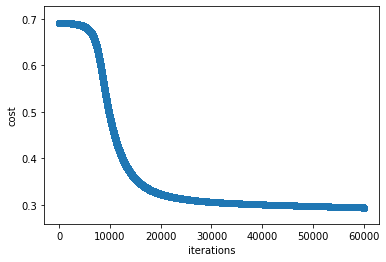

In [22]:
W_model, b_model = model(X_train.T, Y_train.reshape((Y_train.shape[0], 1)).T, layer_dims, actfunc, 0.01, 60000)

#### Predicting for the training dataset.

In [23]:
Y_pred_train = predict(X_train.T, W_model, b_model, layer_dims, actfunc)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### Retrieving the accuracy score, precision and recall.

In [25]:
accuracy_score(Y_train, Y_pred_train), precision_score(Y_train, Y_pred_train), recall_score(Y_train, Y_pred_train)

(0.8833333333333333, 0.8758169934640523, 0.8933333333333333)

#### Predicting for the test dataset.

In [26]:
Y_pred_test = predict(X_test.T, W_model, b_model, layer_dims, actfunc)

#### Retrieving the accuracy score, precision and recall.

In [27]:
accuracy_score(Y_test, Y_pred_test), precision_score(Y_test, Y_pred_test), recall_score(Y_test, Y_pred_test)

(0.89, 0.8823529411764706, 0.9)

#### Predicting for the original dataset.

In [28]:
Y_pred = predict(X.T, W_model, b_model, layer_dims, actfunc)

#### Retrieving the accuracy score, precision and recall.

In [29]:
accuracy_score(Y, Y_pred), precision_score(Y, Y_pred), recall_score(Y, Y_pred)

(0.885, 0.8774509803921569, 0.895)

#### Comparing the original dataset and the predicted dataset.

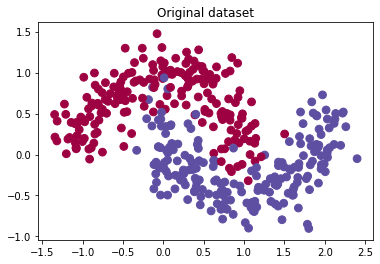

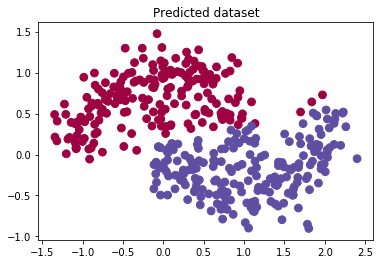

In [30]:
ax = plt.subplot()
plt.scatter(X[:, 0], X[:, 1], s = 60, c = Y, cmap = plt.cm.Spectral)
plt.title("Original dataset")
plt.show()

ax = plt.subplot()
plt.scatter(X[:, 0], X[:, 1], s = 60, c = Y_pred, cmap = plt.cm.Spectral)
plt.title("Predicted dataset")
plt.show()
